In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
df=pd.read_csv('Fuel_Consumption_2000-2022.csv')

In [20]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [21]:
df.shape

(22556, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [7]:
df.EMISSIONS.unique()

array([186, 175, 230, 264, 198, 189, 191, 267, 269, 218, 193, 248, 225,
       232, 214, 255, 251, 258, 260, 246, 237, 223, 239, 281, 331, 244,
       336, 242, 253, 228, 382, 308, 317, 294, 324, 288, 343, 338, 292,
       301, 329, 386, 235, 200, 205, 216, 202, 209, 327, 352, 377, 322,
       359, 122, 163, 131, 345, 347, 276, 283, 304, 290, 221, 196, 170,
       177, 207, 313, 320, 375, 340, 396, 271, 285, 306, 350, 370, 389,
       334, 314, 423, 421, 458, 442, 522, 262, 356, 297, 315, 310, 299,
       274, 384, 361, 172, 156,  83, 179, 168, 212, 278, 354, 407, 182,
       154, 161, 152, 145, 162, 138, 363, 243, 368, 380, 391, 316, 319,
       373, 184, 426, 402, 400, 166, 147, 140, 106, 159, 409, 318, 412,
       344, 428, 393, 398, 321, 330, 150, 444, 467, 208, 455, 570, 312,
       259, 227, 110, 136, 165, 135, 307, 291, 346,  94, 148, 151, 405,
       270, 341, 296, 371, 513, 469, 419, 453, 414, 275, 229, 265, 113,
       272, 197, 286, 366, 104, 430, 173, 305, 337, 222, 233, 33

In [8]:
df.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [22]:
X = df[['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']]
y = df['EMISSIONS']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (for regression)
])

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50

452/452 [==============================] - 1s 2ms/step - loss: 30864.4551 - val_loss: 5712.8452
Epoch 2/50
452/452 [==============================] - 1s 2ms/step - loss: 1866.1304 - val_loss: 515.6070
Epoch 3/50
452/452 [==============================] - 1s 2ms/step - loss: 416.3461 - val_loss: 376.8603
Epoch 4/50
452/452 [==============================] - 1s 2ms/step - loss: 351.0452 - val_loss: 331.0950
Epoch 5/50
452/452 [==============================] - 1s 2ms/step - loss: 326.2395 - val_loss: 307.9345
Epoch 6/50
452/452 [==============================] - 1s 2ms/step - loss: 307.6926 - val_loss: 291.5682
Epoch 7/50
452/452 [==============================] - 1s 2ms/step - loss: 293.8415 - val_loss: 277.2604
Epoch 8/50
452/452 [==============================] - 1s 2ms/step - loss: 279.0475 - val_loss: 263.0820
Epoch 9/50
452/452 [==============================] - 1s 2ms/step - loss: 266.9280 - val_loss: 249.2883
Epoch 10/50
452/452 [==============================] - 1s 2

In [28]:
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

141/141 [==============================] - 0s 1ms/step - loss: 134.4055
Mean Squared Error on Test Data: 134.40550231933594


In [29]:
predictions = model.predict(X_test_scaled)

141/141 [==============================] - 0s 1ms/step


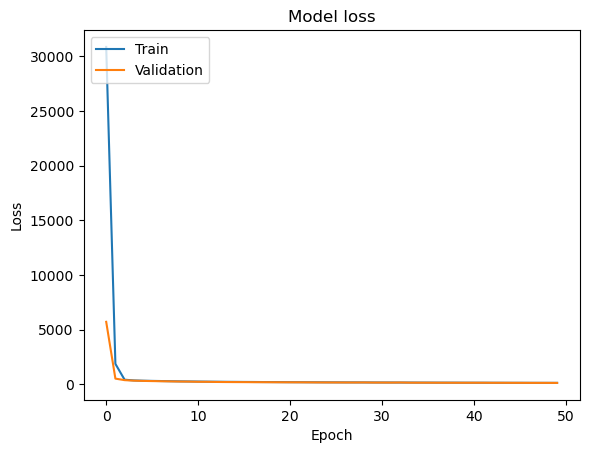

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()